<a href="https://www.kaggle.com/code/fall2fire/school-performance-analysis-predictive-modeling?scriptVersionId=280974731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# In this notebook we will perform the following things:-
### 1. Data Analysis
### 2. Feature Engineering
### 3. Finding Some Patterns in data
### 4. Predictive Modeling

In [1]:
# Basic Libaries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/school-performance-analysis/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Checking Null Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# EDA (Exploratory Data Analysis)

gender
female    518
male      482
Name: count, dtype: int64


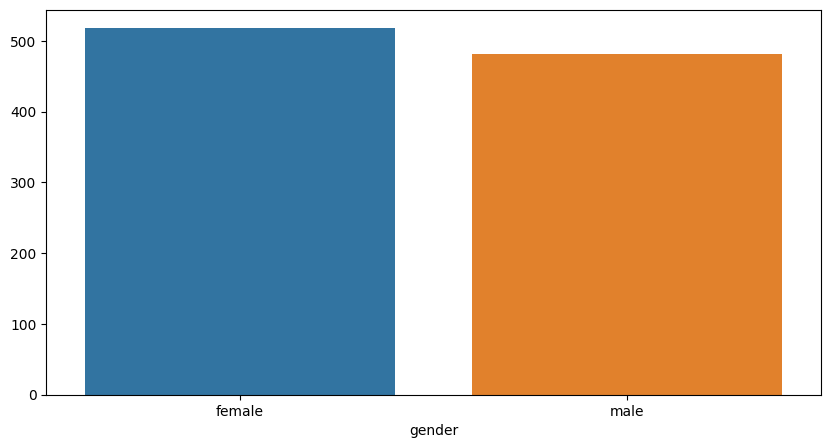



race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


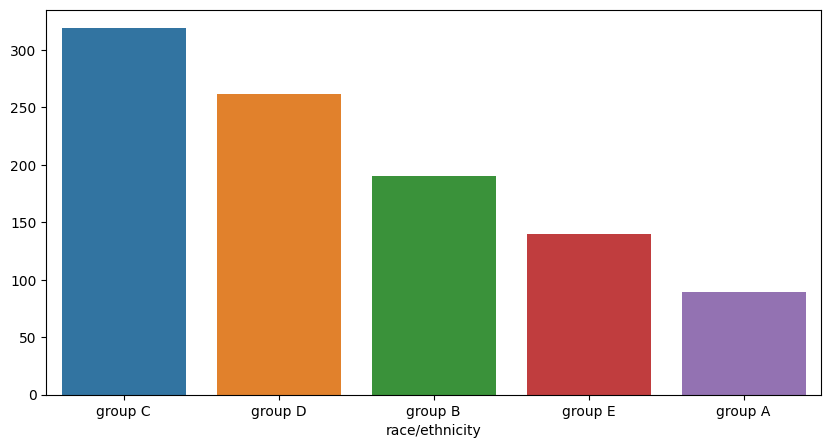



parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


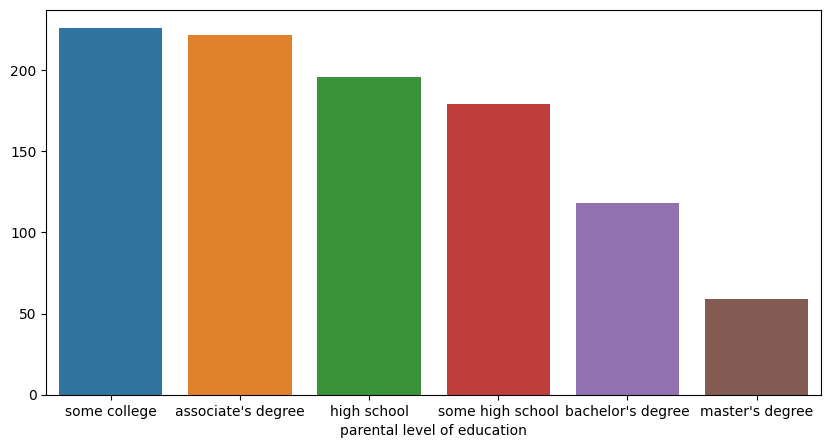



lunch
standard        645
free/reduced    355
Name: count, dtype: int64


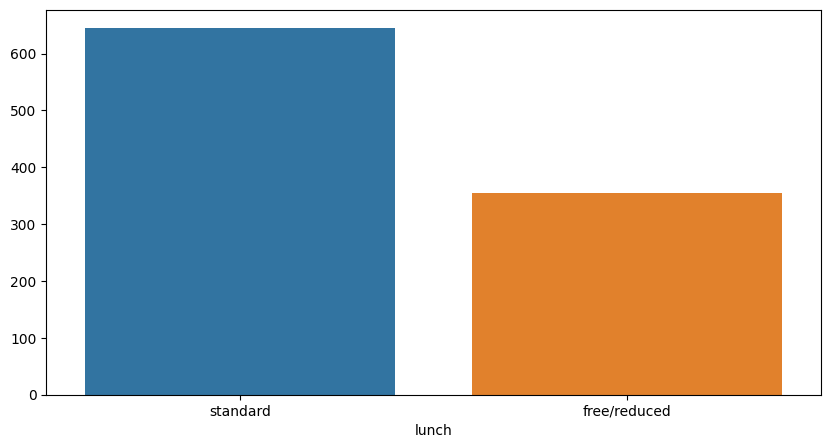



test preparation course
none         642
completed    358
Name: count, dtype: int64


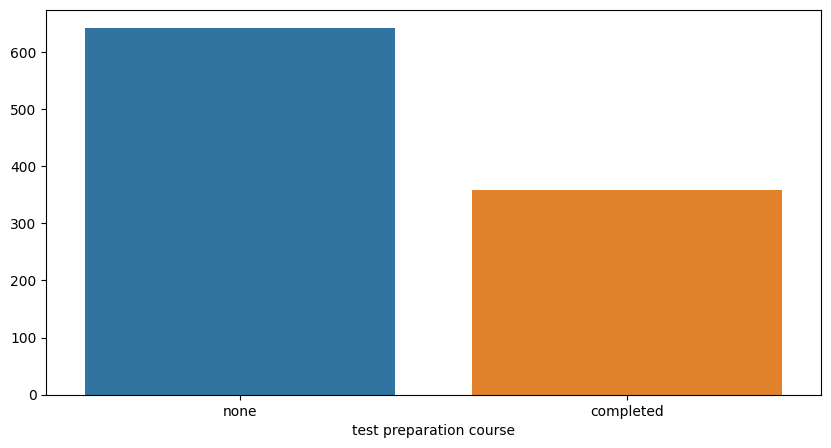



math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64


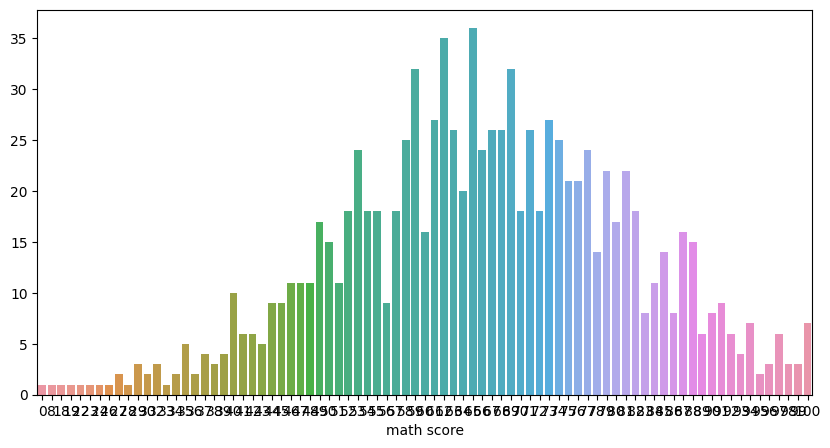



reading score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: count, Length: 72, dtype: int64


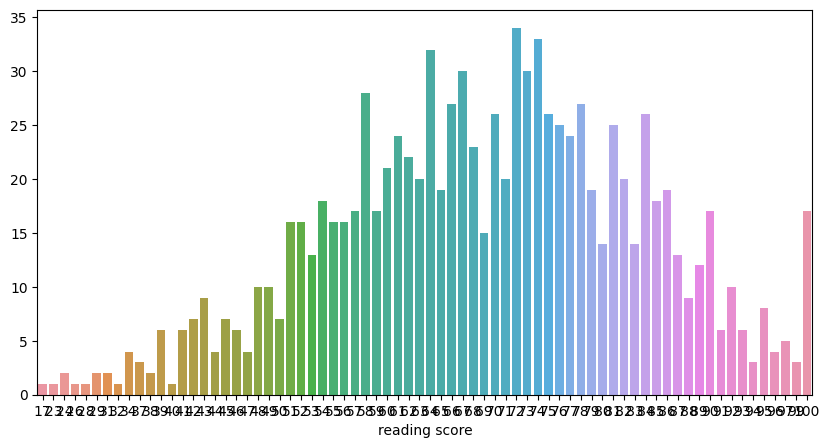



writing score
74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: count, Length: 77, dtype: int64


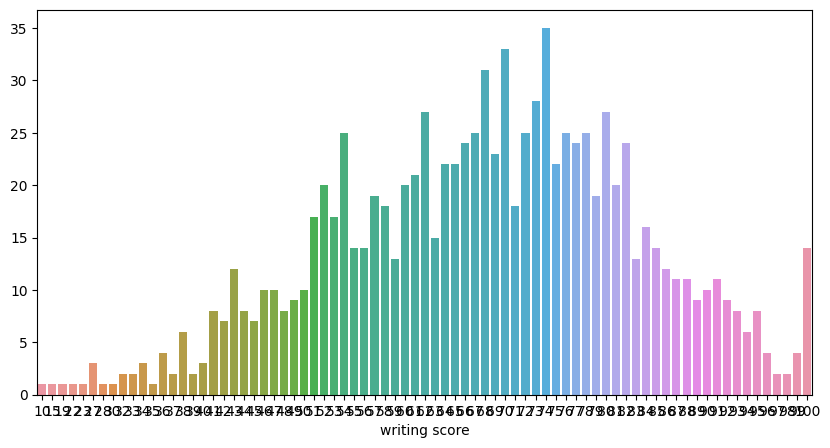

In [6]:
for i in df:
    x=df[i].value_counts()
    print(x)
    plt.figure(figsize=(10,5))
    sns.barplot(x=x.index,y=x.values)
    plt.show()
    print("\n")
    

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Observations
## 1. There is class imbalance in ***Race/Ethnicity*** | Group order -->(Majority) C > D > B > E > A (Minority)
## 2. Class imbalance also in ***Parental Education*** and **Moderate Class Imbalance** in ***Lunch*** and ***Test Preparation***
## 3. Will be easy to build ML models (clean data, no extreme imbalance)

## Piecharts

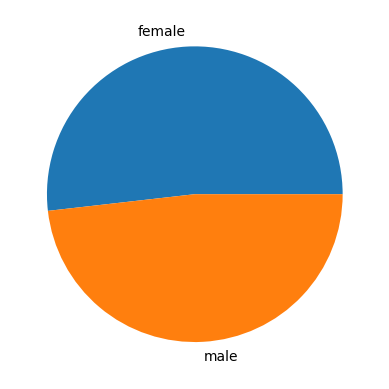

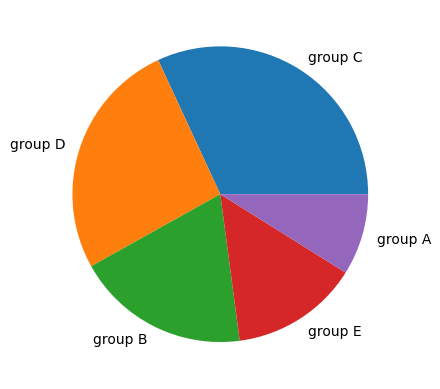

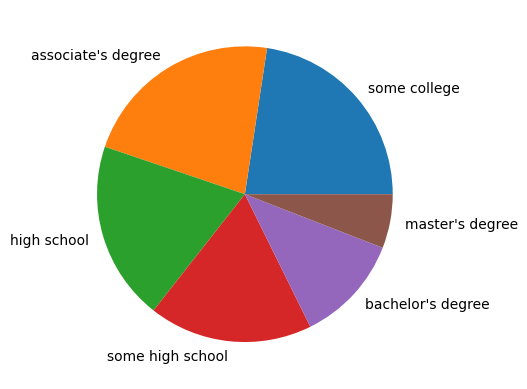

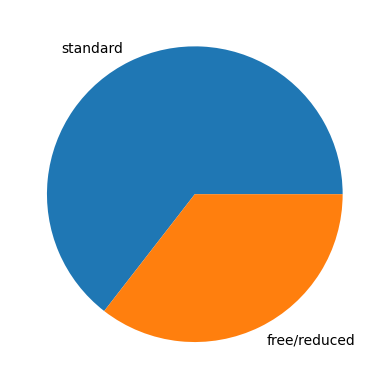

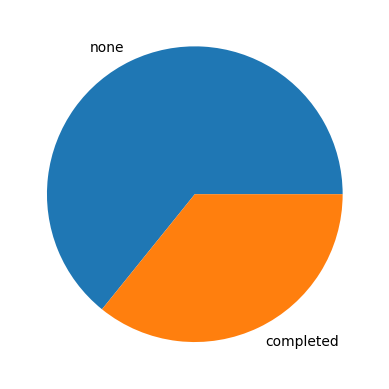

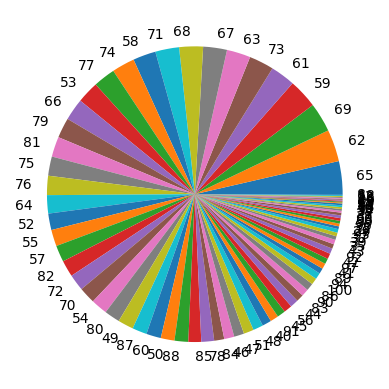

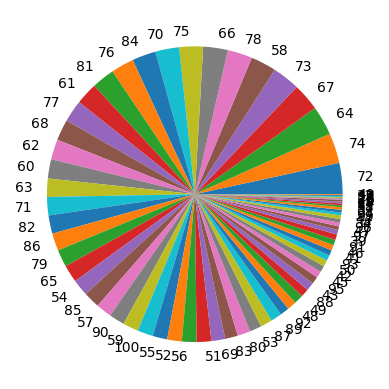

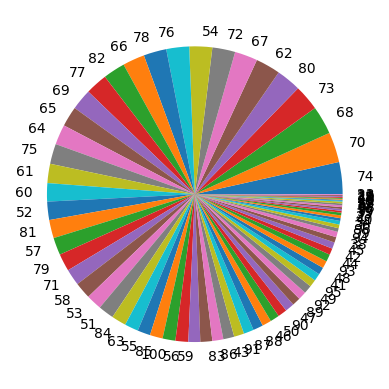

In [8]:
for i in df:
    count=df[i].value_counts()
    plt.pie(count,labels=count.index)
    plt.show()

## Outlier Detection

<Axes: >

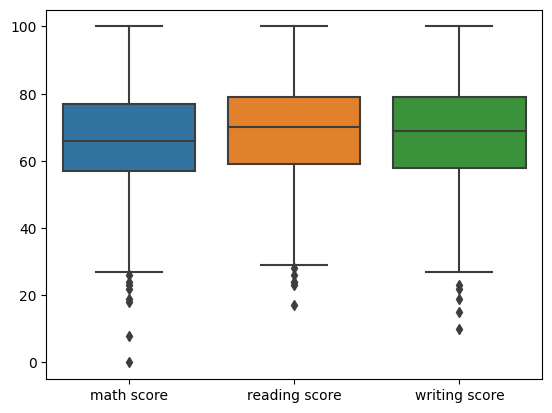

In [9]:
sns.boxplot(df)

# Feature Engineering
## For creating target variable

In [10]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).astype(int)

In [11]:
def classify(score):
    if score >= 80:
        return 2   # High Performer
    elif score >= 60:
        return 1   # Medium Performer
    else:
        return 0   # Low Performer

df['performance_level'] = df['avg_score'].apply(classify)

In [12]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72,1
1,female,group C,some college,standard,completed,69,90,88,82,2
2,female,group B,master's degree,standard,none,90,95,93,92,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,0
4,male,group C,some college,standard,none,76,78,75,76,1
5,female,group B,associate's degree,standard,none,71,83,78,77,1
6,female,group B,some college,standard,completed,88,95,92,91,2
7,male,group B,some college,free/reduced,none,40,43,39,40,0
8,male,group D,high school,free/reduced,completed,64,64,67,65,1
9,female,group B,high school,free/reduced,none,38,60,50,49,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg_score                    1000 non-null   int64 
 9   performance_level            1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


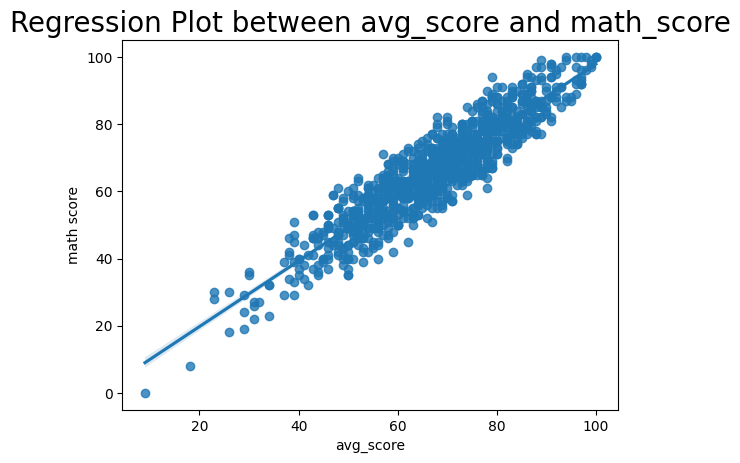

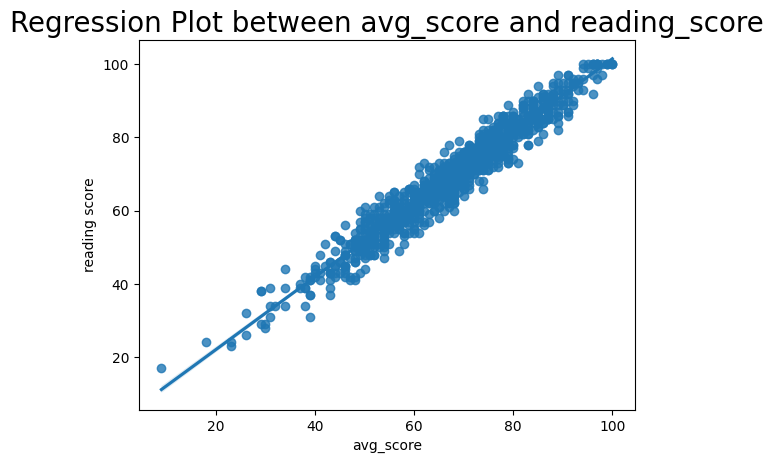

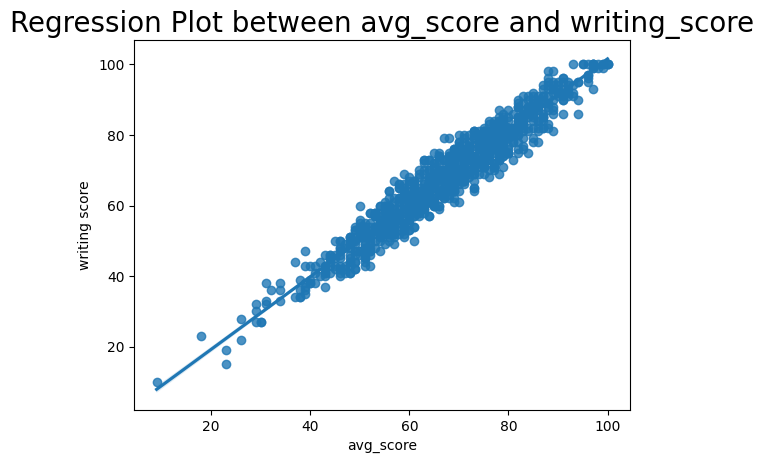

In [14]:
plt.title('Regression Plot between avg_score and math_score', fontsize=20)
sns.regplot(x=df['avg_score'],y=df['math score'])
plt.show()
plt.title('Regression Plot between avg_score and reading_score', fontsize=20)
sns.regplot(x=df['avg_score'],y=df['reading score'])
plt.show()
plt.title('Regression Plot between avg_score and writing_score', fontsize=20)
sns.regplot(x=df['avg_score'],y=df['writing score'])
plt.show()

## 3D Scatter Plot

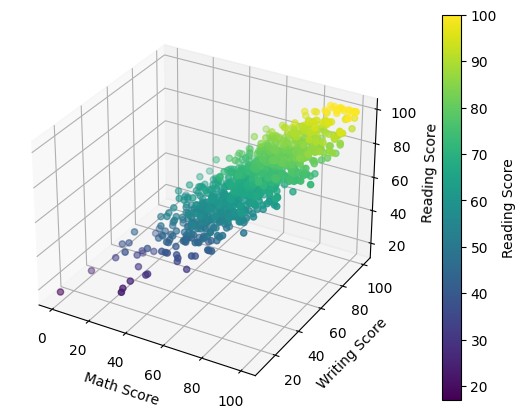

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(
    df['math score'],
    df['writing score'],
    df['reading score'],
    c=df['reading score'],     # color mapped 
    cmap='viridis' )

ax.set_xlabel('Math Score')
ax.set_ylabel('Writing Score')
ax.set_zlabel('Reading Score')

plt.colorbar(sc, label='Reading Score')
plt.show()


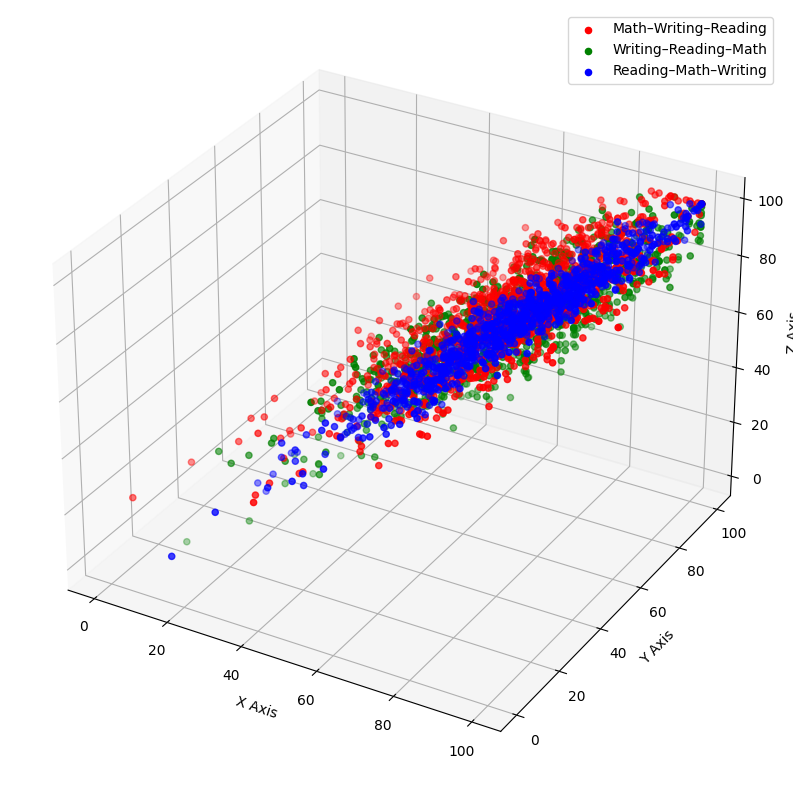

In [16]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(projection='3d')

# Scatter 1: Math vs Writing vs Reading
ax.scatter(
    df['math score'],
    df['writing score'],
    df['reading score'],
    color='red',
    label='Math–Writing–Reading'
)

# Scatter 2: Writing vs Reading vs Math
ax.scatter(
    df['writing score'],
    df['reading score'],
    df['math score'],
    color='green',
    label='Writing–Reading–Math'
)

# Scatter 3: Reading vs Math vs Writing
ax.scatter(
    df['reading score'],
    df['math score'],
    df['writing score'],
    color='blue',
    label='Reading–Math–Writing'
)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

ax.legend()
plt.show()


## Target variable distribution (**performance_level**)

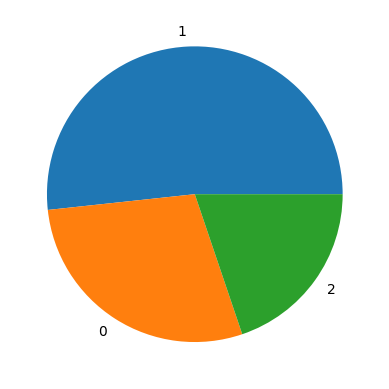

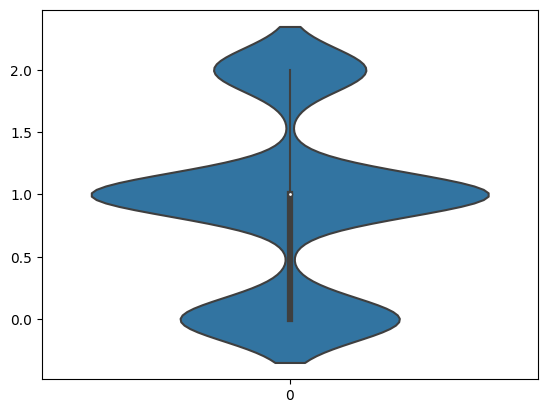

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


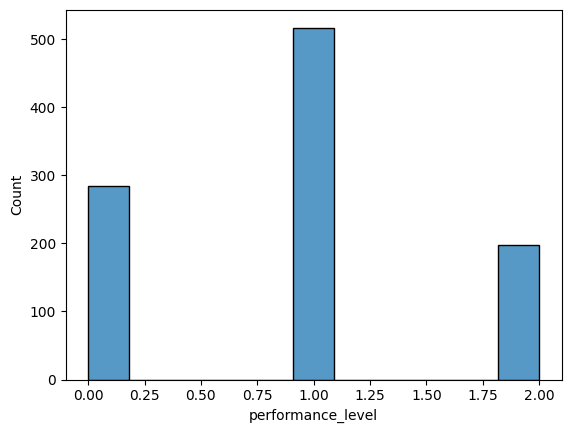

In [17]:
count=df['performance_level'].value_counts()
plt.pie(count,labels=count.index)
plt.show()
sns.violinplot(df['performance_level'])
plt.show()
sns.histplot(df['performance_level'])
plt.show()

In [18]:
df.rename(columns={'test preparation course': 'test_prep'}, inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_prep,math score,reading score,writing score,avg_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72,1
1,female,group C,some college,standard,completed,69,90,88,82,2
2,female,group B,master's degree,standard,none,90,95,93,92,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,0
4,male,group C,some college,standard,none,76,78,75,76,1


### Providing Numerical Mapping to Categorical values

In [19]:
# Binary Encoding
df['gender'] = df['gender'].map({'female': 0,'male': 1})

df['lunch'] = df['lunch'].map({'standard': 1,'free/reduced': 0})

df['test_prep'] = df['test_prep'].map({'none': 0,'completed': 1})

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_prep,math score,reading score,writing score,avg_score,performance_level
0,0,group B,bachelor's degree,1,0,72,72,74,72,1
1,0,group C,some college,1,1,69,90,88,82,2
2,0,group B,master's degree,1,0,90,95,93,92,2
3,1,group A,associate's degree,0,0,47,57,44,49,0
4,1,group C,some college,1,0,76,78,75,76,1


In [21]:
# Ordinal Mapping
edu_map = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental level of education'] = df['parental level of education'].map(edu_map)

# One-Hot Encoding
df = pd.get_dummies(df, columns=['race/ethnicity'], prefix='race').astype(int)

df.head(11)

,gender,parental level of education,lunch,test_prep,math score,reading score,writing score,avg_score,performance_level,race_group A,race_group B,race_group C,race_group D,race_group E
0,0,4,1,0,72,72,74,72,1,0,1,0,0,0
1,0,2,1,1,69,90,88,82,2,0,0,1,0,0
2,0,5,1,0,90,95,93,92,2,0,1,0,0,0
3,1,3,0,0,47,57,44,49,0,1,0,0,0,0
4,1,2,1,0,76,78,75,76,1,0,0,1,0,0
5,0,3,1,0,71,83,78,77,1,0,1,0,0,0
6,0,2,1,1,88,95,92,91,2,0,1,0,0,0
7,1,2,0,0,40,43,39,40,0,0,1,0,0,0
8,1,1,0,1,64,64,67,65,1,0,0,0,1,0
9,0,1,0,0,38,60,50,49,0,0,1,0,0,0


## Correlation Heatmap

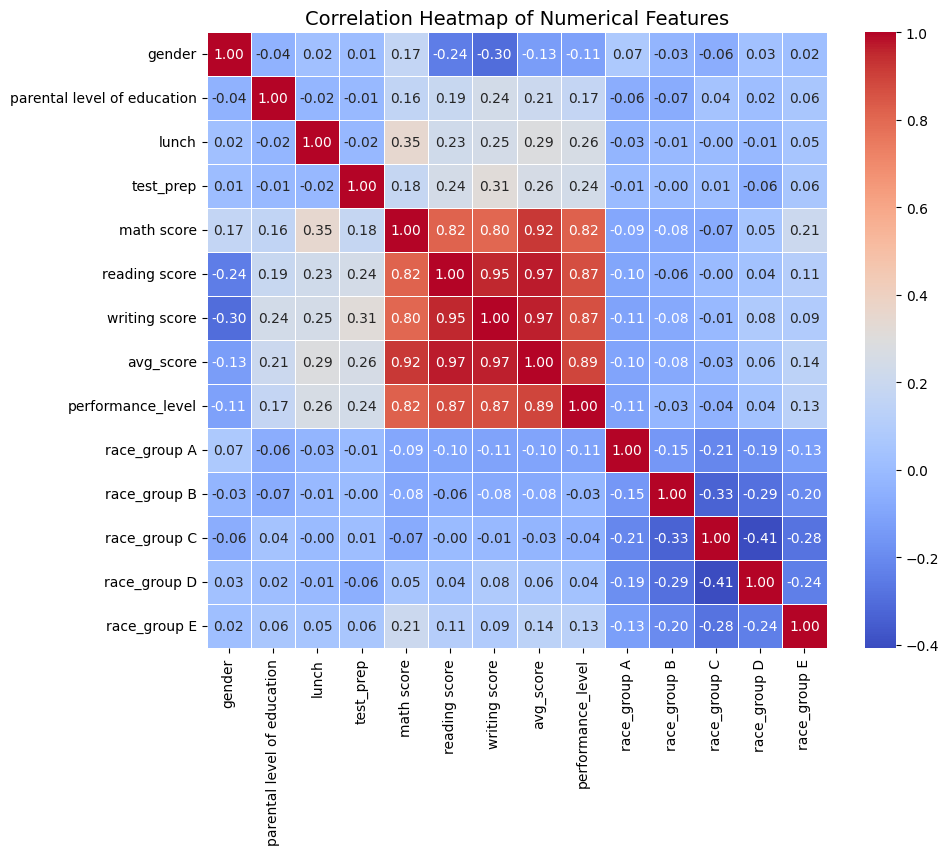

In [22]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

# Observations
## ~ Columns: **math score,reading score,writing score,avg_score** are highly correlated with target variable
## ~ Columns: **parental level of education,lunch,test_prep** are slightly correlated with target
## ~ Also some other columns are slightly correlated to each other

# Predictive Modeling 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df.drop(columns=['avg_score','performance_level','math score','reading score'])
y = df['performance_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.884

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        71
           1       0.88      0.90      0.89       129
           2       0.89      0.80      0.84        50

    accuracy                           0.88       250
   macro avg       0.89      0.87      0.88       250
weighted avg       0.88      0.88      0.88       250



In [24]:
print("Input Features/Predicting Variables")
X.head()

Input Features/Predicting Variables


,gender,parental level of education,lunch,test_prep,writing score,race_group A,race_group B,race_group C,race_group D,race_group E
0,0,4,1,0,74,0,1,0,0,0
1,0,2,1,1,88,0,0,1,0,0
2,0,5,1,0,93,0,1,0,0,0
3,1,3,0,0,44,1,0,0,0,0
4,1,2,1,0,75,0,0,1,0,0


## -> Considering this notebook you can perform more feature engineering and can add more features
## -> You can also predict the **math score** or **writing score** or **reading score**


### ***I hope you will find this notebook useful 🙂***